# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [160]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [161]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [162]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [163]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [164]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [165]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response,indent=4,sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19335575,
            "id": 1,
            "last_updated": 1680486905,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 534853819227,
                    "percent_change_1h": -1.40657694663466,
                    "percent_change_24h": -2.45498745057093,
                    "percent_change_7d": -1.13119231174931,
                    "percentage_change_1h": -1.40657694663466,
                    "percentage_change_24h": -2.45498745057093,
                    "percentage_change_7d": -1.13119231174931,
                    "price": 27731.0,
                    "volume_24h": 12239747990
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19335575,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [166]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response,indent=4,sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120445564,
            "id": 1027,
            "last_updated": 1680486896,
            "max_supply": 120445564,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 212579198713,
                    "percent_change_1h": -1.15044579727877,
                    "percent_change_24h": -2.53914025326767,
                    "percent_change_7d": -0.32786211529795,
                    "percentage_change_1h": -1.15044579727877,
                    "percentage_change_24h": -2.53914025326767,
                    "percentage_change_7d": -0.32786211529795,
                    "price": 1771.04,
                    "volume_24h": 6905782501
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120445564,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [167]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
# YOUR CODE HERE
print(f"Current price of BTC is {btc_price:,.2f} USD")


Current price of BTC is 27,731.00 USD


In [168]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
print(f"Current price of ETH is {eth_price:,.2f} USD")


Current price of ETH is 1,771.04 USD


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [169]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"BTC current value: {btc_value:,.2f} USD")


BTC current value: 33,277.20 USD


In [170]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"ETH current value: {eth_value:,.2f} USD")


ETH current value: 9,386.51 USD


In [171]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"Total crypto currency value is {total_crypto_wallet:,.2f} USD")

Total crypto currency value is 42,663.71 USD


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [172]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [173]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
alpaca_api_key = os.getenv('ALPACA_API_KEY')
# YOUR CODE HERE
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

display(type(alpaca_api_key))
display(type(alpaca_secret_key))
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [174]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ['AGG','SPY']

# Set timeframe to 1Day
# YOUR CODE HERE
timeframe='1D'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
start_date = pd.Timestamp("2023-03-31",tz='America/New_York').isoformat()
end_date = start_date
# end_date = pd.Timestamp("2023-03-31",tz='America/New_York').isoformat()
# YOUR CODE HERE


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [175]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
response_df = alpaca.get_bars(tickers, timeframe, start_date, end_date).df
response_df

# response_df[response_df['S']=='AGG']

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AGG = response_df[response_df['symbol']=='AGG'].drop('symbol',axis=1)
SPY = response_df[response_df['symbol']=='SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
combined_df  = pd.concat([AGG,SPY],axis=1,keys=tickers)
combined_df.index = combined_df.index.date

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
combined_df.head()

AGG                                                       \
             open   high    low  close   volume trade_count       vwap   
2023-03-31  99.39  99.69  99.16  99.64  7089403       28229  99.448758   

               SPY                                                            
              open   high     low   close     volume trade_count        vwap  
2023-03-31  404.66  409.7  404.55  409.39  108386077      690249  407.199127

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [176]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = combined_df['AGG']['close'][0]
agg_close_price = float(agg_close_price)

# Print the AGG closing price
# YOUR CODE HERE
print(f'Closing price of AGG is {agg_close_price}')


Closing price of AGG is 99.64


In [177]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = combined_df['SPY']['close'][0]
spy_close_price = float(spy_close_price)
# Print the SPY closing price
# YOUR CODE HERE
print(f'Closing price of SPY is {spy_close_price}')


Closing price of SPY is 409.39


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [178]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of the bonds is {agg_value:,.2f} USD") 

The current value of the bonds is 19,928.00 USD


In [179]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(f"The current value of the stocks is {spy_value:,.2f} USD")

The current value of the stocks is 45,032.90 USD


In [180]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f"The current value of total stocks and bonds is {total_stocks_bonds:,.2f} USD")


The current value of total stocks and bonds is 64,960.90 USD


In [181]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The value of total portfolio (Crypto, Stocks and Bonds) is {total_portfolio:,.2f} USD")


The value of total portfolio (Crypto, Stocks and Bonds) is 107,624.61 USD


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [182]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
savings_data
    

[42663.712, 64960.9]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [183]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
columns = ['amount']
index_list = ['crypto','stock/bond']
savings_df = pd.DataFrame(data=savings_data)

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df.columns = ['amount']
savings_df.index = index_list
savings_df


,amount
crypto,42663.712
stock/bond,64960.900


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Members portfolio'}, ylabel='amount'>

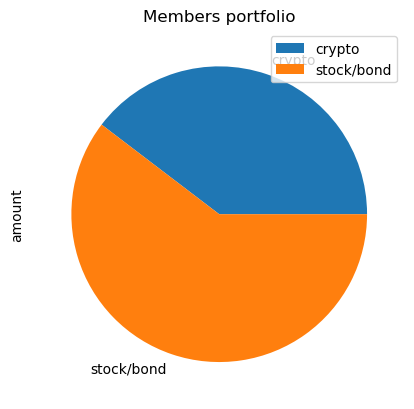

In [184]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y='amount',title = 'Members portfolio')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [185]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [186]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
print(f"Emergency Fund Target {emergency_fund_value:,.2f}")
print(f"Total Portfolio value {savings_df['amount'].sum():,.2f}")

if(savings_df['amount'].sum() > emergency_fund_value):
    print("Congratulations! You have enough money in the fund")
elif(savings_df['amount'].sum() == emergency_fund_value):
    print("Congratulations! You have reached an important milestone")
else:
    print(f"Great going. You need {emergency_fund_value-savings_df['amount'].sum():,.2f} more to have enough savings in your portfolio")

# YOUR CODE HERE
# YOUR CODE HERE


Emergency Fund Target 36,000.00
Total Portfolio value 107,624.61
Congratulations! You have enough money in the fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [187]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
end_date = pd.Timestamp('2020-08-07',tz='America/New_York').isoformat()
start_date = pd.Timestamp('2017-08-07',tz='America/New_York').isoformat()
# start_date = pd.Timestamp(end_date,'America/New_York').isoformat()
# YOUR CODE HERE


In [188]:
# define keys that are needed to make the Alpaca API call
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# display the type of the key to ensure that the key has been read
display(f"The type of api key: {type(alpaca_api_key)}")
display(f"The type of secret key: {type(alpaca_secret_key)}")

# intialize the REST api with the alpaca object. this will be used to download data later on
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
pricing_df = alpaca.get_bars(tickers, timeframe, start_date, end_date).df
# display(pricing_df.head())
# display(pricing_df.tail())

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
SPY = pricing_df[pricing_df['symbol']=='SPY'].drop('symbol',axis=1)
AGG = pricing_df[pricing_df['symbol']=='AGG'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE
ticker_df = pd.concat([SPY, AGG], axis=1, keys= ['SPY','AGG'])
ticker_df.index = ticker_df.index.date

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
display(ticker_df.head())
# YOUR CODE HERE
display(ticker_df.tail())


"The type of api key: <class 'str'>"

"The type of secret key: <class 'str'>"

SPY                                                   \
              open    high     low     close     volume trade_count   
2017-08-07  247.49  247.87  247.37  247.8400   31995021      100111   
2017-08-08  247.51  248.91  246.83  247.2700   61719353      192921   
2017-08-09  246.47  247.31  246.06  247.2700   62632619      223650   
2017-08-10  246.29  246.44  243.70  243.7599  120418270      424321   
2017-08-11  244.02  244.80  243.75  244.1100   74869947      278786   

                           AGG                                      \
                  vwap    open    high       low    close   volume   
2017-08-07  247.668698  109.69  109.72  109.6066  109.685  2359826   
2017-08-08  247.739709  109.67  109.69  109.5000  109.580  2570876   
2017-08-09  246.791421  109.87  109.87  109.6600  109.670  2308932   
2017-08-10  245.027847  109.70  109.85  109.6700  109.800  2004163   
2017-08-11  244.222867  109.75  109.94  109.6800  109.870  1913253   

                                    
           trade_count        vwap  
2017-08-07        7755  109.674876  
2017-08-08       12663  109.577636  
2017-08-09       11031  109.771749  
2017-08-10       12437  109.776611  
2017-08-11       10113  109.860974

SPY                                                \
                open    high     low   close    volume trade_count   
2020-08-03  328.3200  329.62  327.73  328.67  53078112      288003   
2020-08-04  327.8600  330.06  327.86  330.00  41917896      250899   
2020-08-05  331.4700  332.39  331.18  332.03  42870955      241416   
2020-08-06  331.4799  334.46  331.13  334.32  43679448      290036   
2020-08-07  333.2800  334.88  332.30  334.57  57282821      350100   

                           AGG                                      \
                  vwap    open    high       low   close    volume   
2020-08-03  328.658795  119.37  119.40  119.1903  119.40  13014535   
2020-08-04  329.057592  119.42  119.63  119.4200  119.63  10935154   
2020-08-05  331.791643  119.39  119.49  119.3100  119.40  17377874   
2020-08-06  332.939600  119.62  119.73  119.5300  119.57   4608710   
2020-08-07  333.800372  119.66  119.73  119.3950  119.43   5559066   

                                    
           trade_count        vwap  
2020-08-03       36359  119.282420  
2020-08-04       39113  119.541666  
2020-08-05       42313  119.387245  
2020-08-06       15938  119.604199  
2020-08-07       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [189]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
weights = [0.6,0.4]
num_trading_days_in_year = 252
num_simulations = 500

# Review the simulation input data
# YOUR CODE HERE
mc_30ysim = MCSimulation(portfolio_data=ticker_df
                        ,weights=weights
                        ,num_simulation=num_simulations
                        ,num_trading_days=num_trading_days_in_year*30)


In [190]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
mc_30ysim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Sreedhar\Rice\FinTech\Weekly Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000913,1.002601,0.996172,1.004306,1.015903,0.981220,0.990351,1.005563,1.001729,1.001562,...,0.992790,1.003361,1.008431,1.009449,0.993873,0.996748,0.986678,1.005068,1.000447,1.006341
2,1.009551,1.006985,0.998650,1.002742,1.019979,0.980376,1.001008,1.000582,1.020308,1.007823,...,1.002003,0.999289,1.011971,1.016028,0.995125,1.004346,0.989105,1.011503,0.988991,1.006483
3,1.009976,1.004972,0.976318,1.003359,1.019419,0.980284,0.997878,1.004494,1.029021,1.020878,...,0.989573,1.003599,1.001520,1.004819,0.975815,1.021341,0.992347,1.005746,0.989619,1.004278
4,1.012125,1.001978,0.976525,1.001702,1.021249,0.991814,1.006028,1.004919,1.031750,1.022003,...,0.977404,1.020242,1.010301,1.009442,0.982297,1.019516,1.001457,1.008737,0.993392,0.996179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.026827,6.959372,10.080583,62.683200,26.403956,4.504494,18.697049,27.608869,22.936849,7.584535,...,13.240295,2.308350,6.456884,7.239254,3.383394,17.724239,3.683991,8.056633,3.696524,7.770641
7557,15.018232,7.114210,10.227281,62.416812,26.418537,4.436169,18.922767,27.721500,22.945479,7.713814,...,13.075607,2.281878,6.475463,7.196039,3.390780,17.780788,3.754489,8.149494,3.699161,7.697606
7558,14.958937,7.138958,10.245057,63.299851,26.256387,4.428464,18.774196,27.962456,22.782534,7.795374,...,13.226307,2.258607,6.533730,7.125175,3.408273,17.837217,3.731818,8.074639,3.713878,7.811762
7559,15.013702,7.175993,10.231610,63.712451,26.528534,4.498744,18.867645,27.983533,22.911786,7.726091,...,13.298005,2.222171,6.572890,7.129137,3.412887,17.818762,3.746477,7.997227,3.705356,7.803913


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

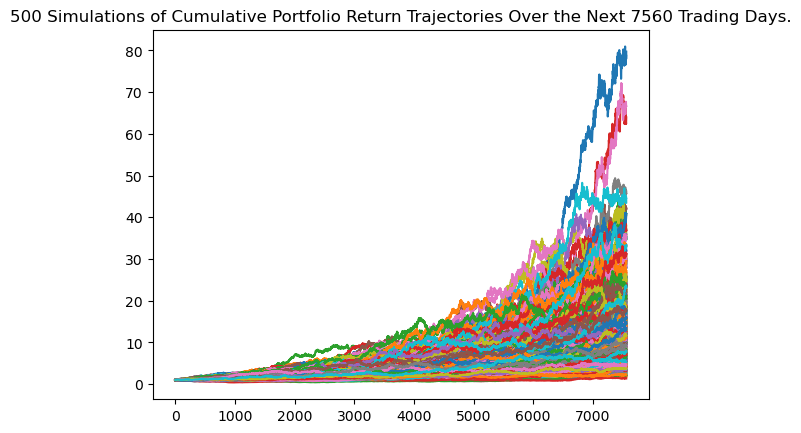

In [191]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_30ysim.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

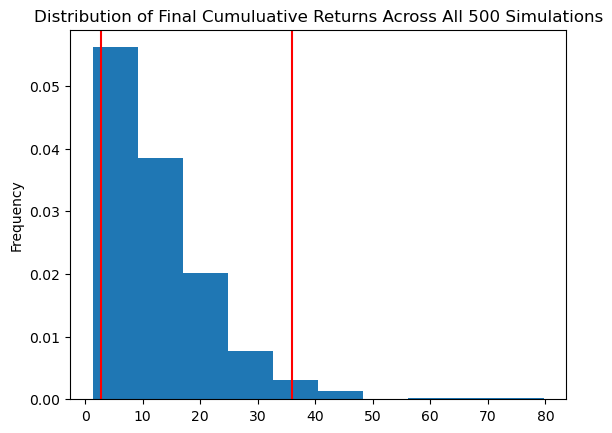

In [192]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_30ysim.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [193]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_30y_summary_statistics = mc_30ysim.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_30y_summary_statistics

count           500.000000
mean             12.948595
std               9.614547
min               1.343421
25%               5.925288
50%              10.299983
75%              17.511467
max              79.710092
95% CI Lower      2.702152
95% CI Upper     35.930098
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [194]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
display(f"Current balance of stock and bond portion of members portfolio: {total_stocks_bonds:,.2f}")

'Current balance of stock and bond portion of members portfolio: 64,960.90'

In [195]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mc_30y_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mc_30y_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that the current value of the portfolio {total_stocks_bonds:,.2f}"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

There is a 95% chance that the current value of the portfolio 64,960.90 over the next 30 years will end within the range of $175,534.20 and $2,334,051.53.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [196]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
weights = [0.8,0.2]
# Review the simulation input data
# YOUR CODE HERE
mc_10ysim = MCSimulation(portfolio_data=ticker_df, weights=weights, num_simulation=num_simulations, num_trading_days=num_trading_days_in_year*10)

In [197]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
mc_10ysim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Sreedhar\Rice\FinTech\Weekly Challenges\Challenge5\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985639,1.010876,0.994785,0.991568,1.011003,0.991178,1.000709,1.004061,1.007938,1.012319,...,0.983675,1.008635,1.002822,1.012827,0.997297,1.000270,1.002340,0.997347,1.002085,0.989120
2,0.993368,1.015030,0.988770,1.000220,0.982323,0.993779,0.983542,1.019500,0.997982,1.020815,...,0.949306,1.021898,1.005935,1.022265,0.976028,1.004209,0.997415,0.971782,1.001876,0.985156
3,0.999299,1.015504,0.998377,0.991544,0.985852,0.999026,0.992614,1.017065,0.988477,1.026894,...,0.950236,1.015745,1.006820,1.014908,0.983358,1.002904,0.972076,0.960594,0.996972,0.992440
4,0.997717,1.038663,0.996049,1.010035,0.989742,0.997306,0.977179,1.015172,0.997184,1.018759,...,0.959583,1.032832,1.019519,1.035213,0.984268,0.991800,0.973116,0.961695,0.992865,0.992012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.512150,1.011271,0.776915,3.416465,2.616716,3.360229,4.287070,1.550862,3.307511,5.675841,...,8.164427,2.057259,1.981060,1.914370,1.988575,4.072305,0.824733,3.475536,2.234570,6.468341
2517,2.552226,1.017415,0.773974,3.406419,2.591745,3.396648,4.233850,1.539712,3.311692,5.657168,...,8.172630,2.075703,1.971133,1.922523,1.954697,4.109123,0.832338,3.508469,2.234421,6.351036
2518,2.583122,1.009765,0.778911,3.413945,2.575894,3.503936,4.310917,1.531130,3.317855,5.615471,...,8.141499,2.057546,1.988498,1.944688,1.978408,4.112292,0.836384,3.459838,2.266584,6.405260
2519,2.530227,1.010695,0.774796,3.492564,2.602794,3.513708,4.396055,1.533583,3.265106,5.740985,...,8.135116,2.004686,2.003359,1.944315,1.982868,4.093272,0.841298,3.451651,2.333925,6.350519


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

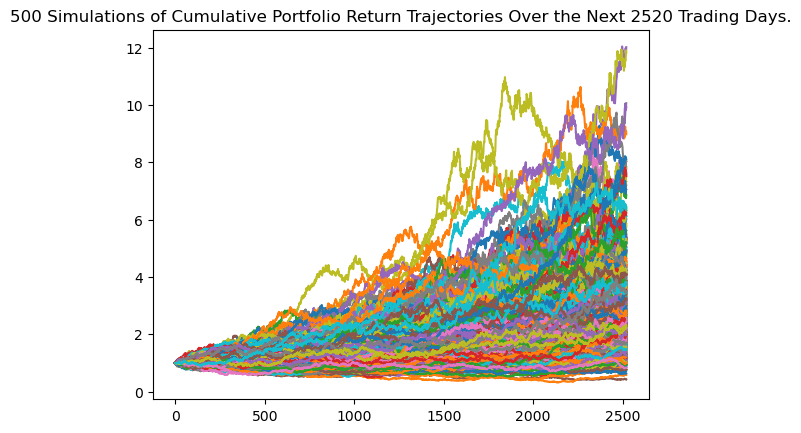

In [198]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
mc_10ysim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

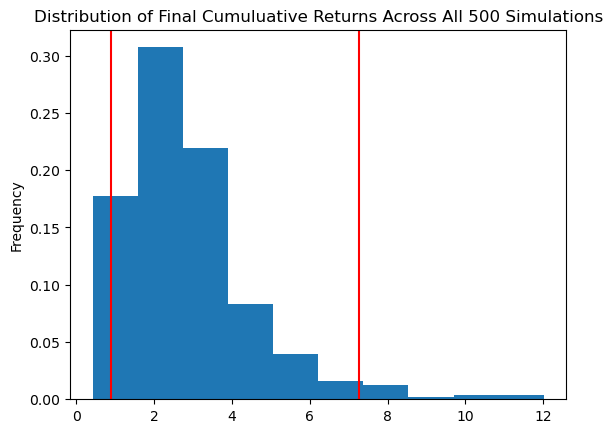

In [199]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
mc_10ysim.plot_distribution()

In [200]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
mc_10y_summary_statistics = mc_10ysim.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
mc_10y_summary_statistics

count           500.000000
mean              2.849666
std               1.624552
min               0.426596
25%               1.745733
50%               2.463055
75%               3.514139
max              12.012329
95% CI Lower      0.883145
95% CI Upper      7.267980
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [201]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
display(f"Current balance of stock and bond portion of members portfolio: {total_stocks_bonds:,.2f}")

'Current balance of stock and bond portion of members portfolio: 64,960.90'

In [202]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = mc_10y_summary_statistics[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = mc_10y_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that the current value of the portfolio {total_stocks_bonds:,.2f}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")

There is a 95% chance that the current value of the portfolio 64,960.90 over the next 10 years will end within the range of $57,369.92 and $472,134.53.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** It is difficult to say if the member could retire after 10 years with an aggressive stock weight as it is unknown at this time on what is the timeframe that the member is looking at to use the savings. 
In the worst case scenrio, the member will have $57,358 from the stocks and bonds. It is unknown if the member will maintain or increase his/her position in Crypto. Given that in the worst case, the money from stocks and bonds will only cover for 5 months (considering emergency monthly funds is at $12,000), the recommendation will be to continue with portion of the investment if the member decides to retire after 10 years
